<a href="https://colab.research.google.com/github/stenoe/FEDS/blob/main/notebooks/LectureNotebooks/FEDS_lesson03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Dealing with tabular data

## 3.1 What is a dataframe?

Dataframes are very similar to the spreadsheets!

* They let you access data in rows and columns
* The columns can have human friendly names :)
* The rows are by default represented with a numerical index of (`int`) numbers
* The index can be changed, it can be text, or dates also

In Python, dataframes are provided the the Pandas package (https://pandas.pydata.org/).



In [ ]:
# Let's create a simple dataframe

# Import pandas
import pandas as pd

# Creating a dictionary that contain some data
data = {
    "calories" : [510, 390, 479],
    "duration" : [60, 42, 57]
}

# load the data into the dataframe
df = pd.DataFrame(data)

df

,calories,duration
0,510,60
1,390,42
2,479,57


## 3.2 Simple access operations on the dataframe

How to access our data?

We can:

1. access rows
2. access columns
3. access elements

In [ ]:
# 1. Get the first row of data
# Recall, Python array like datatypes (np.array, lists) start with zero!

df.iloc[0] # iloc[int] access with integer index

calories    510
duration     60
Name: 0, dtype: int64

In [ ]:
# 2. Get the "duration" column (simplest version)

df.duration

0    60
1    42
2    57
Name: duration, dtype: int64

In [ ]:
# 2a Get the "duration" column by access with the column name as key (cf. dictionaries)

df["duration"]

0    60
1    42
2    57
Name: duration, dtype: int64

In [ ]:
# 2b Get the duration column via loc[]

df.loc[:, "duration"]

0    60
1    42
2    57
Name: duration, dtype: int64

In [ ]:
# 2c Get the "duration" column by iloc[]

df.iloc[:, 1]

0    60
1    42
2    57
Name: duration, dtype: int64

In [ ]:
# 3. Access a single element, let's get the element at the 2nd position in the first row

df.at[1, "duration"]

42

## 3.3 Add an index with text instead of `int` numbers

This feature is useful if your data has few rows that can be used like categories.


In [ ]:
# Add a textual index to our dataframe

# This is the little bit more complicated way if you already have a dataframe
df = df.set_axis(["running", "biking", "swimming"], axis=0)

df

,calories,duration
running,510,60
biking,390,42
swimming,479,57


### 3.3.1 Info about the axes of a dataframe

Dataframes are multidimensional objects! In the easiest case, like here, they have only 2 dimensions. That is actually also the most common form. The `axes` property is listing the dataframes axes that are both indices.  

In [ ]:
df.axes

[Index(['running', 'biking', 'swimming'], dtype='object'),
 Index(['calories', 'duration'], dtype='object')]

In [ ]:
# The easist way is to add the index names just at the creation

df2 = pd.DataFrame(data, index=["running", "biking", "swimming"])

df2

,calories,duration
running,510,60
biking,390,42
swimming,479,57


## 3.4 Learn about the dimensions, shape and size of the dataframe

1. `size` property returns the number of elements in the dataframe
2. `shape` property returns the number of rows and columns, i.e., the shape or the dimensions of the dataframe
3. `ndim` property returns the number of columns in the dataframe

In [ ]:
df.size

6

In [ ]:
df.shape

(3, 2)

In [ ]:
df.ndim

2

### 3.4.1 Let's visualise, visualise and visualise ...

It is a good idea to visualise your data not only graphically but as well the shape, dimensions and sizes of data. It helps often to understand the data in a better way.

Python has the `print()` function and the **f-string** formatting. With this, its fairly easy to make informal textual visualisations of dataframes.

Let's get the same information of the last three cells in one go :)

In [ ]:
# Info about the dataframe using f-string formatting

print(f"The dataframe has {df.size} elements, its dimensions are (rows, cols): {df.shape} and it has {df.ndim} columns")

The dataframe has 6 elements, its dimensions are (rows, cols): (3, 2) and it has 2 columns


## 3.5 Get some statistical informations on your data

Dataframes allow to make some basic statistics right out of the box.

To do so, we can use the `describe()` method.

In [ ]:
# Using describe for basic statisics of your data

df.describe()

,calories,duration
count,3.000000,3.000000
mean,459.666667,53.000000
std,62.292322,9.643651
min,390.000000,42.000000
25%,434.500000,49.500000
50%,479.000000,57.000000
75%,494.500000,58.500000
max,510.000000,60.000000


## 3.6 Can we plot the data?

Yes, we can plot by using the dataframe. For the most simple plots, it's not even needed to import the `matplotlib.pyplot` package.

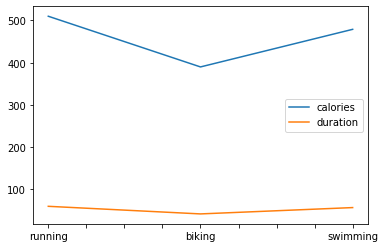

In [ ]:
# Plot the contents of the dataframe

df.plot();

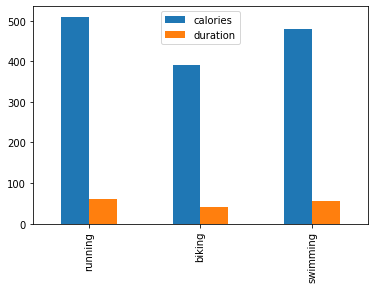

In [ ]:
# or as a bar chart
df.plot.bar();

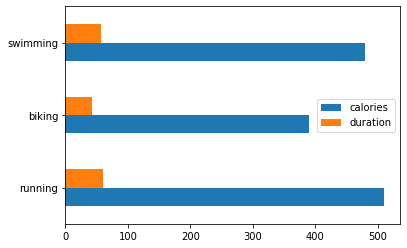

In [ ]:
# or an horizontal bar chart
df.plot.barh();

**NOTE:** By using the plot functionality of the pandas dataframe, we can get very fast a good overview about the data we have.

The plot **decorations** like legend and tick labels are set from the index and column names automatically.

## 3.7 Let's recreate the quadratic function from the last time by using  a dataframe

To generate the list, we need to:

1. use a loop to generate the x axis values (same as last lecture)
2. set up a dataframe and store the x axis values into it
3. create a new column with the squared data

In [ ]:
# 1. Generate the x-axis data by a for loop

xdata = [] # empty list

for i in range(-50, 50+1,1): # to have data from -50 to +50
  xdata.append(i)

# Print first and last three entries to check
print(f"xdata: {xdata[:3]} ... {xdata[-3:]}")

xdata: [-50, -49, -48] ... [48, 49, 50]


In [ ]:
# 2. Create the dataframe

df3 = pd.DataFrame({"X": xdata})
df3

,X
0,-50
1,-49
2,-48
3,-47
4,-46
...,...
96,46
97,47
98,48
99,49


In [ ]:
# 3. Create a new column with squared data

df3["x2"] = df3.X * df3.X
df3

,X,x2
0,-50,2500
1,-49,2401
2,-48,2304
3,-47,2209
4,-46,2116
...,...,...
96,46,2116
97,47,2209
98,48,2304
99,49,2401


**NOTE:** The dataframe tries to show a relevant part of your data. Normally, some rows at the beginning and some at the end. If we do not want to see many data it's possible to use the `head()` method. It shows only the first 4 or five rows when no argument is given.

In [ ]:
# Show first rows of the dataset
df3.head()

,X,x2
0,-50,2500
1,-49,2401
2,-48,2304
3,-47,2209
4,-46,2116


In [ ]:
# Show only 3 rows
df3.head(3)

,X,x2,x3
0,-50,2500,-125000
1,-49,2401,-117649
2,-48,2304,-110592


### 3.7.1 Plotting our squared data as line plot

This is very easy using the built in functionality, we can apply the `plot` function to the column with the squared data `x2`

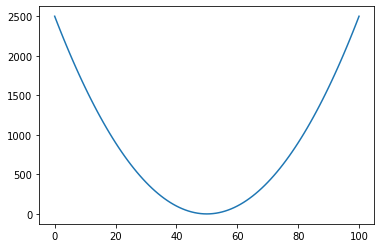

In [ ]:
df3.x2.plot();

### 3.7.2 Plotting a scatter plot of our data

A scatter plot need to have the x and the y data provided! In the case of dataframes, we can identify them by their column names.

The method `plot.scatter(x, y, ...)` is used.

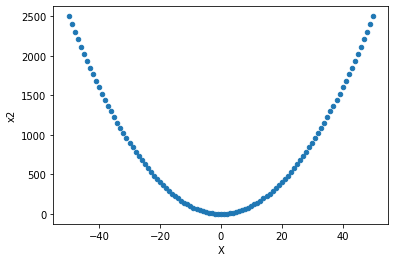

In [ ]:
# plotting using plot.scatter(x, y)

df3.plot.scatter("X", "x2");

## 3.8 Challenge: add the qubic function $y = x^3$ to the dataframe

To do so:

1. think how to create the $x^3$, it can be done by $x * x * x$ or $x^2 * x$. Use whatever you think is easier
2. create the new column named `x3` and add it to the dataframe `df3`


In [ ]:
# get the cubic function

df3["x3"] = df3.x2 * df3.X

df3

,X,x2,x3
0,-50,2500,-125000
1,-49,2401,-117649
2,-48,2304,-110592
3,-47,2209,-103823
4,-46,2116,-97336
...,...,...,...
96,46,2116,97336
97,47,2209,103823
98,48,2304,110592
99,49,2401,117649


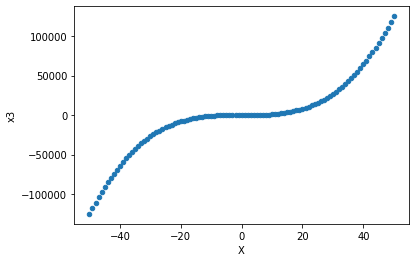

In [ ]:
# plot the data

df3.plot.scatter("X", "x3");

## 3.9 Plotting using `matplotlib.pyplot` functionality

While the standard dataframe plots are neat, they have only few possibilities to customise the plots and to use more decorations.

However, it's easy to use the matplotlib functionality!

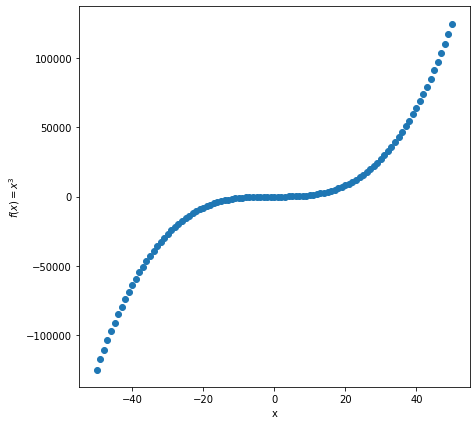

In [ ]:
# import matplotlib

import matplotlib.pyplot as plt

# Set a figure size and store the ax object to use for decorations
fig, ax = fig, axs = plt.subplots(1, 1, figsize=(7, 7))

# plot the scatter
ax.scatter(df3.X, df3.x3)

# increase the fontsize for the labels and ticks
plt.rc("font", size=20)

# use the ax to set meaninful labels
ax.set_xlabel("x")
ax.set_ylabel("$f(x) = x^3$")

# show the plot
plt.show()